In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
#importing needed libraries

In [125]:
df=pd.read_csv('energydata_complete (1).csv', encoding='latin-1')
#reading dataset

In [126]:
df.head(5)
#viewing dataset

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [127]:
df.info()
#checking for the information on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [128]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [129]:
df.isna().sum()
#checking for null values

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<ipython-input-130-14b26ada939d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')


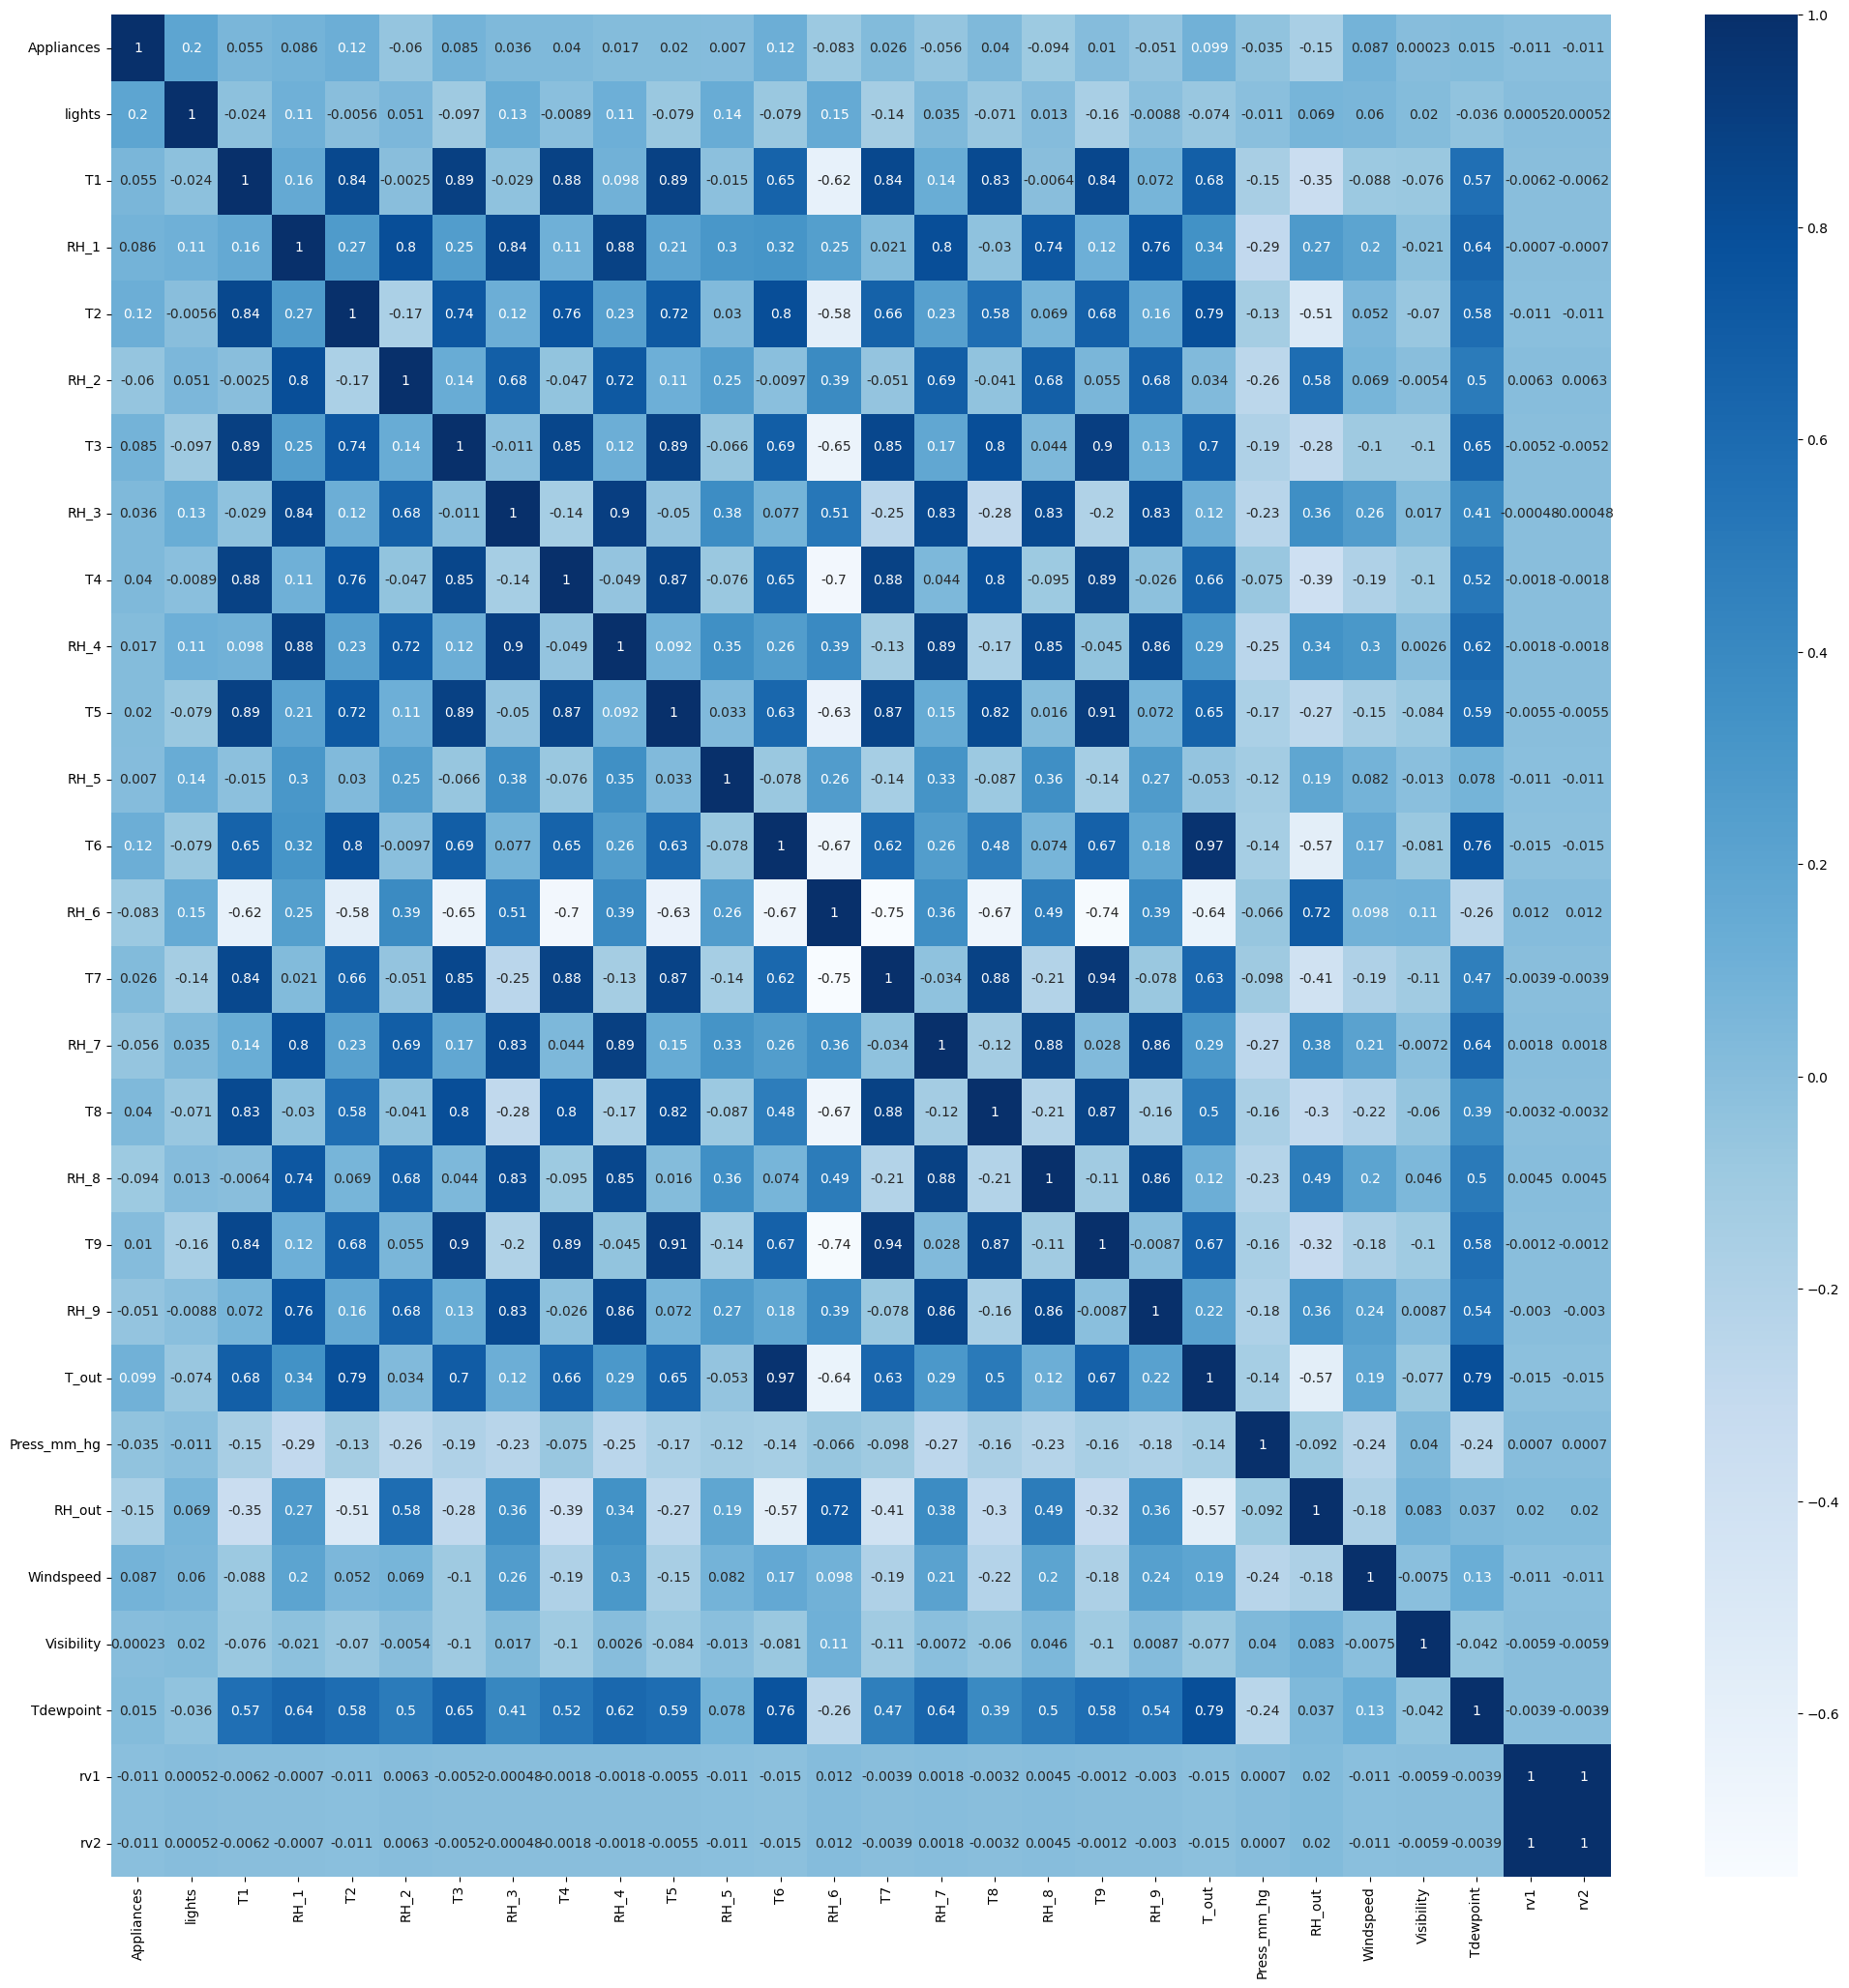

In [130]:
#checking for the correlation of the dataset against themselves
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

QUESTION 12

In [131]:
x = df['T2'].values.reshape(-1, 1)
y = df['T6']

In [132]:
#fitting linear model on the relationship between X and Y
Linear_model = LinearRegression()
Linear_model.fit(x,y)
LinearRegression



sklearn.linear_model._base.LinearRegression

In [133]:
predict = Linear_model.predict(x)
round(Linear_model.score(x,y),2)

0.64

QUESTION 13

In [134]:
df1 = df.drop(['date', 'lights'], axis =1)
#dropping the date and lights columns

In [135]:
#checking to see the columns have been dropped
df1.head(1)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.79,19.79,44.73,19.0,45.566667,17.166667,...,17.033333,45.53,6.6,733.5,92.0,7.0,63.0,5.3,13.275433,13.275433


In [136]:
#normalizing the dataset
scalar = MinMaxScaler()

df_normalize = pd.DataFrame(scalar.fit_transform(df1), columns=df1.columns)

x_df = df_normalize.drop('Appliances', axis = 1)

y_df = df_normalize['Appliances']

#training and testing data

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.3, random_state = 42)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predict_values = linear_model.predict(x_test)

In [137]:
predict_values

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [138]:
y_test

8980     0.028037
2754     0.074766
9132     0.037383
14359    0.037383
8875     0.056075
           ...   
831      0.224299
10993    0.046729
11761    0.037383
12364    0.093458
11863    0.037383
Name: Appliances, Length: 5921, dtype: float64

In [139]:
x_df.columns
print(x_df.columns)

Index(['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
       'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1',
       'rv2'],
      dtype='object')


In [140]:
#Calculating the MAE
error= mean_absolute_error(y_test, predict_values)
round(error, 2)

0.05

QUESTION 14

In [141]:
#Calculating the RSS in two decimal places
rss = np.sum(np.square(predict_values - y_test))
round(rss,2)

45.35

QUESTION 15

In [142]:
#Calculating the Root Mean Squared Error in three decimal places
root_mean_squared_error= np.sqrt(mean_squared_error(predict_values, y_test))
round(root_mean_squared_error,3)

0.088

QUESTION 16

In [143]:
#Calculating the Coefficient of Determination in two decimal places
R_squared = r2_score(y_test,predict_values)
round(R_squared,2)

0.15

QUESTION 17

In [144]:
#Obtaining the features with the lowest and highest weights from linear model

def get_weights_df(model, feat, col_name):
  #this function returns the weight of every feature
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [145]:
model_weight = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
model_weight

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


From the model, RH_1 feature has the highest weight while RH_2 feature has the lowest weight.

QUESTION 18

In [146]:
ridge_reg = Ridge(alpha = 0.4)
ridge_reg.fit(x_train, y_train)
prediction = ridge_reg.predict(x_test)

In [147]:
ridge_rmse = np.sqrt(mean_squared_error(y_test, prediction))
round(ridge_rmse,3)

0.088

QUESTION 19

In [148]:
Lasso_reg = Lasso(alpha = 0.001)
Lasso_reg.fit(x_train, y_train)
prediction = ridge_reg.predict(x_test)
Lasso_predict = Lasso_reg.predict(x_test)

In [149]:
model_weight = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(Lasso_reg, x_train, 'Lasso_Weight')

In [150]:
final_weights = pd.merge(model_weight, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on = 'Features')

In [151]:
np.count_nonzero(final_weights.Lasso_Weight)

4

QUESTION 20

In [152]:
Lasso_rmse = (mean_squared_error(y_test, Lasso_predict))

print(Lasso_rmse)

0.008757535449401907


In [153]:
print(round(Lasso_rmse,3))

0.009
